In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Задание
Цель: Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.
Описание задания:
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.
Этапы работы:

<h3>1.Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [532]:
# загружаем данные
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<h3>2.	Проведите первичный анализ.
<br>а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [533]:
# Типы данных
print('Training data shape: ', df.shape)
df.dtypes.value_counts()

Training data shape:  (214, 10)


float64    9
int64      1
dtype: int64

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


пропусков нет, данные имеют формат float

In [535]:
# уникальные значения целевой функции
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

<h3>3.Разделите выборку на обучающее и тестовое подмножества. 
     <br> 80% данных оставить на обучающее множество, 20% - на тестовое.

In [536]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

<h3>4.Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [537]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [538]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy')
# Обучаем модель
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)

<h3>5.Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [539]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_absolute_error, mean_squared_error, r2_score  
print('Метрики                  Значения')
print('MAE                      : %.3f'%mean_absolute_error(y_test, y_pred))
print('MSE                      : %.3f'%mean_squared_error(y_test, y_pred))
print('RMSE                     : %.3f'%np.sqrt(mean_squared_error(y_test, y_pred)))

print('r2_score                 : %.3f'%r2_score(y_test, y_pred))

Метрики                  Значения
MAE                      : 0.558
MSE                      : 1.628
RMSE                     : 1.276
r2_score                 : 0.657


<h2>6.	Обработайте выбросы в данных.
<br>а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

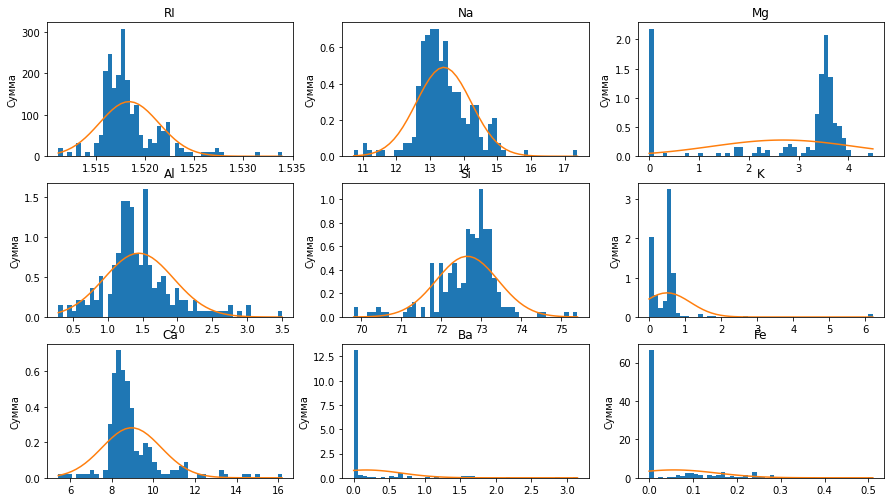

In [540]:
# построим графики распределения параметров с отображением нормального распределения 
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

plt.figure(figsize=(15,35), facecolor='white')
plotnumber =1
for feature in X:
    ax = plt.subplot(12,3,plotnumber)
    n, bins, patches = plt.hist(df[feature], 50, density=True)
    mu = np.mean(df[feature])
    sigma = np.std(df[feature])
    plt.plot(bins, norm.pdf(bins, mu, sigma))
    
    #plt.xlabel(feature)
    plt.ylabel('Сумма')
    plt.title(feature)
    plotnumber+=1
plt.show()

Визуально под нормальное распределение попадают графики 1,2,4,5,7 

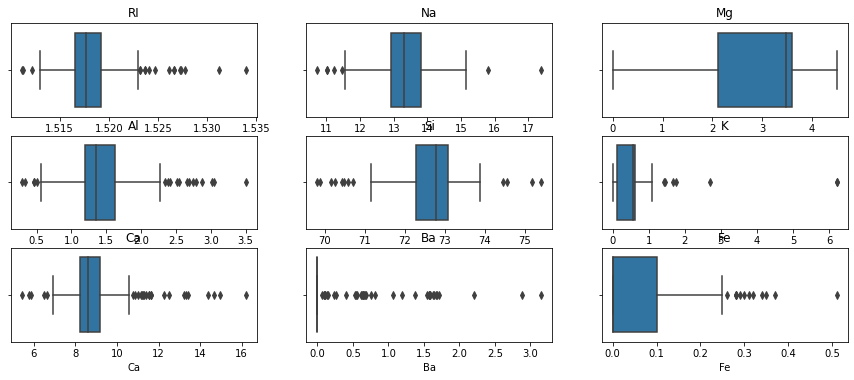

In [541]:
# построим графики распределения параметров sns.boxplot
plt.figure(figsize=(15,10), facecolor='white')
plotnumber =1
for feature in X:
    ax = plt.subplot(5,3,plotnumber)
    sns.boxplot(data = X, x = X[feature])#, orient="v")
    #plt.xlabel(feature)
    #plt.ylabel('Кол-во')
    plt.title(feature)
    plotnumber+=1
plt.show()

<Figure size 1800x720 with 0 Axes>

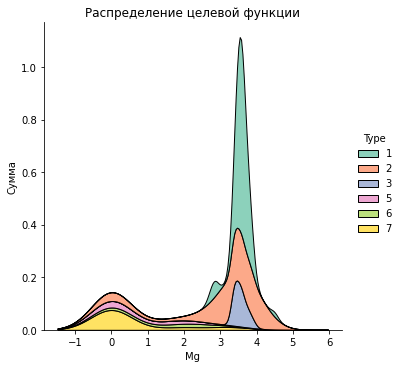

In [542]:
# для примера построим график sns.displot по параметру Mg
plt.figure(figsize=(25,10), facecolor='white')
sns.displot(df, x="Mg", hue="Type", kind="kde", multiple="stack", palette='Set2')
plt.xlabel('Mg')
plt.ylabel('Сумма')
plt.title('Распределение целевой функции')
plt.show()  

In [543]:
# проверим параметры на соответствие нормальному распределению
import scipy
for feature in X:
    stat, p = scipy.stats.shapiro(df[feature]) # тест Шапиро-Уилк
    stat2, p2 = scipy.stats.normaltest(df[feature]) # Критерий согласия Пирсона
    print('   Statistics Шапиро-Уилк =%.3f, p-value=%.3f' % (stat, p),'; Statistics Пирсона=%.3f, p-value=%.3f' % (stat2, p2))
    alpha, alpha2 = (0.05,0.05)
    if p > alpha and p2 > alpha2:
        print(f'Принять гипотезу о нормальности Шапиро-Уилк (Пирсона) для "{feature}"')
    else:
        print(f'   Отклонить гипотезу о нормальности Шапиро-Уилк (Пирсона) для "{feature}"')
    print(scipy.stats.anderson(df[feature], dist='norm'))# Критерий Андерсона

   Statistics Шапиро-Уилк =0.868, p-value=0.000 ; Statistics Пирсона=84.358, p-value=0.000
   Отклонить гипотезу о нормальности Шапиро-Уилк (Пирсона) для "RI"
AndersonResult(statistic=8.419223093681325, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
   Statistics Шапиро-Уилк =0.946, p-value=0.000 ; Statistics Пирсона=27.015, p-value=0.000
   Отклонить гипотезу о нормальности Шапиро-Уилк (Пирсона) для "Na"
AndersonResult(statistic=3.0443636466204396, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
   Statistics Шапиро-Уилк =0.699, p-value=0.000 ; Statistics Пирсона=35.885, p-value=0.000
   Отклонить гипотезу о нормальности Шапиро-Уилк (Пирсона) для "Mg"
AndersonResult(statistic=29.299860338459013, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
   Statistics Шапиро-Уилк =0.943, p

Расчет критериев Шапиро-Уилк, Пирсона, Андерсона (statistic > 1,021) показал, что данные параметров не соответствуют нормальному распределению. Возможная причина - незначительный объем датасета: 214 строк, а также наличие нескольких (6) уникальных значений целевой функции.

<h3>b) Исследуйте признаки на выбросы несколькими способами.

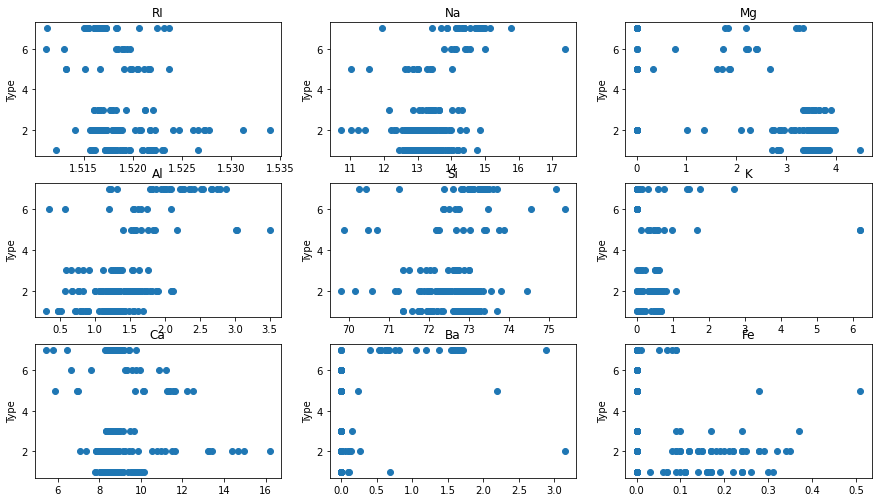

In [544]:
# Рассмотрим графики распределения целевой переменной
plt.figure(figsize=(15,35), facecolor='white')
plotnumber =1
for feature in X:
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(df[feature],df['Type'])
    #plt.xlabel(feature)
    plt.ylabel('Type')
    plt.title(feature)
    plotnumber+=1
plt.show()

Исходя из графиков видно, что практически во всех признаках наблюдаются выбросы значений.

In [545]:
# Нахождение дубликатов
df_dup = df.drop_duplicates()
print(df.shape, df_dup.shape)

(214, 10) (213, 10)


In [546]:
# Метод Z-оценки:
import scipy.stats as stats
z = np.abs(stats.zscore(df))

# z-scores со значением меньше 3 
df2 = df[(z<3).all(axis=1)]
df2.shape

(194, 10)

In [547]:
# z-scores по параметрам
dfZ = df.select_dtypes(include='number').apply(stats.zscore)
dfZ.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17,1.992176e-16
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01,-8.482747e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01,-8.482747e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01,-3.718159e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01,1.046428e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00,2.010478e+00


In [548]:
# Метод межквартильного диапазона:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

# Оставим строки в диапазоне 1.5\*IQR of Q1 and Q3
df3 = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df3.shape

(136, 10)

<h3>c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

In [549]:
# процент удаленных записей от общего числа Type после Z-оценки и удаления квантилей
R2 = df2['Type'].value_counts().sort_index(ascending=True)/df['Type'].value_counts().sort_index(ascending=True)
R3 = df3['Type'].value_counts().sort_index(ascending=True)/df['Type'].value_counts().sort_index(ascending=True)
print(round(R2*100,1)-100)
print(round(R3*100,1)-100)

1     0.0
2   -10.5
3    -5.9
5   -30.8
6   -11.1
7   -20.7
Name: Type, dtype: float64
1   -15.7
2   -27.6
3   -11.8
5   -84.6
6   -44.4
7     NaN
Name: Type, dtype: float64


In [550]:
# Поскольку данных мало - удалим выборочно некоторые выбросы
df4 = df[(df.Ba < 2) & (df.Na < 15.5) & (df.K < 2)]
df4.shape

(206, 10)

<h3>7.Повторите п. 4, п. 5.

In [551]:
# обучим модели с учетом удаления признаков различными способами
from sklearn.model_selection import train_test_split

X2, y2 = df2.iloc[:,:-1], df2.iloc[:,-1]
X3, y3 = df3.iloc[:,:-1], df3.iloc[:,-1]
X4, y4 = df4.iloc[:,:-1], df4.iloc[:,-1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.2)

clf = RandomForestClassifier(criterion='entropy')
clf.fit(X_train2, y_train2)
clf.fit(X_train3, y_train3)
clf.fit(X_train4, y_train4)

y_pred2 = clf.predict(X_test2)
y_pred3 = clf.predict(X_test3)
y_pred4 = clf.predict(X_test4)
y_pred5 = clf.predict(X_train3)# справочно для оценки модели на тренировочном сете

<h3>8.	Сформулируйте выводы по проделанной работе.
<h3>а) Кратко опишите, какие преобразования были сделаны с данными.

Проведены следующие преобразования данных:
оценка формата признаков и целевой переменной, 
использование RandomForestClassifier для оценки классификации 6 признаков,
построение графиков распределений, в том числе sns.boxplot, sns.displot,
проверка распределений на нормальность,
исследование выбросов,
сравнение моделей с учетом предварительной обработки данных

<h3>b) Сравните точность двух моделей.

In [552]:
# сравним метрики качества 4 моделей RandomForestClassifier (базовой, после Z score, расчета квантилей, удаления выбросов):
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, mean_absolute_error, mean_squared_error, r2_score  
print('Метрики    RFC / RFC(Z) / RFC(Q) / RFC(выб) / RFC(Q train)')
print('MAE        : %.3f'%mean_absolute_error(y_test, y_pred), '/ %.3f'%mean_absolute_error(y_test2, y_pred2), '/ %.3f'%mean_absolute_error(y_test3, y_pred3), '/ %.3f'%mean_absolute_error(y_test4, y_pred4))
print('MSE        : %.3f'%mean_squared_error(y_test, y_pred), '/ %.3f'%mean_squared_error(y_test2, y_pred2), '/ %.3f'%mean_squared_error(y_test3, y_pred3), '/ %.3f'%mean_squared_error(y_test4, y_pred4))
print('RMSE       : %.3f'%np.sqrt(mean_squared_error(y_test, y_pred)), '/ %.3f'%np.sqrt(mean_squared_error(y_test2, y_pred2)), '/ %.3f'%np.sqrt(mean_squared_error(y_test3, y_pred3)), '/ %.3f'%np.sqrt(mean_squared_error(y_test4, y_pred4)))
print()
print('r2_score   : %.3f'%r2_score(y_test, y_pred), '/ %.3f'%r2_score(y_test2, y_pred2), '/ %.3f'%r2_score(y_test3, y_pred3), '/ %.3f'%r2_score(y_test4, y_pred4), '/ %.3f'%r2_score(y_train3, y_pred5))

Метрики    RFC / RFC(Z) / RFC(Q) / RFC(выб) / RFC(Q train)
MAE        : 0.558 / 0.026 / 0.036 / 0.286
MSE        : 1.628 / 0.026 / 0.036 / 0.524
RMSE       : 1.276 / 0.160 / 0.189 / 0.724

r2_score   : 0.657 / 0.995 / 0.976 / 0.881 / 0.945


In [553]:
# количество значений целевой функции "Type" после удаления выбросов
df2['Type'].value_counts().sort_index(ascending=True)

1    70
2    68
3    16
5     9
6     8
7    23
Name: Type, dtype: int64

In [ ]:
# данных после удаления выбросов стало еще меньше - есть риск переобучения (некорректной работы модели)

<h3>c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

Оценка выбросов имеет важное значение, особенно если они составляют значительную долю данных. При анализе необходимо определить является ли выброс ошибкой и оценить степень его влияния на выбор и эффективность модели.
На начальном этапе можно использовать визуальную оценку boxplot, а также графики распределений признаков. Минус такого подхода - возможность ошибок в связи неправильным описанием связей между значениями. 
Для более сложных задач рекомендуется использование методов, основанных на плотности и расстоянии данных. При этом отдельное внимание нужно уделить размеру выборок, распределению признаков и количеству классификаций. Основная идея заключается в том, что выбросы находятся дальше, чем их соседи - другие (нормальные) точки. Учитывая этот принцип можно использовать машинное обучение на основе методов ближайших соседей, Z-оценки, межквартильного диапазона, кластеризации.